In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [ ]:
uploaded = files.upload()

Saving Plastic waste.csv to Plastic waste (1).csv


# **Plastic Waste**


In [ ]:
df = pd.read_csv('Plastic waste.csv')

In [ ]:
df

,TIME,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),9540000.0,11410000.0,12090000.0,12340000.0,12880000.0,14940000.0,15140000.0,17220000.0,19030000.0
1,European Union - 28 countries (2013-2020),11580000.0,14860000.0,14580000.0,14370000.0,15260000.0,17620000.0,18090000.0,20160000.0,NaN
2,Belgium,1332559.0,631509.0,1074910.0,716165.0,651775.0,1395458.0,715623.0,745450.0,994896.0
3,Bulgaria,44246.0,25864.0,72972.0,59950.0,99922.0,196124.0,213449.0,260939.0,367487.0
4,Czechia,169315.0,214116.0,232260.0,253923.0,325623.0,347929.0,430416.0,565453.0,556682.0
5,Denmark,53996.0,53779.0,72692.0,78548.0,104816.0,98820.0,114585.0,105457.0,139833.0
6,Germany,1138544.0,1413697.0,1936296.0,2288466.0,2530498.0,2704367.0,2734235.0,2864626.0,3097163.0
7,Estonia,74358.0,89683.0,93713.0,25390.0,22706.0,32966.0,42836.0,52389.0,43142.0
8,Ireland,309155.0,358202.0,39128.0,335134.0,121812.0,183148.0,148536.0,158578.0,197614.0
9,Greece,355234.0,755493.0,672636.0,226992.0,133232.0,192248.0,256905.0,190723.0,172216.0


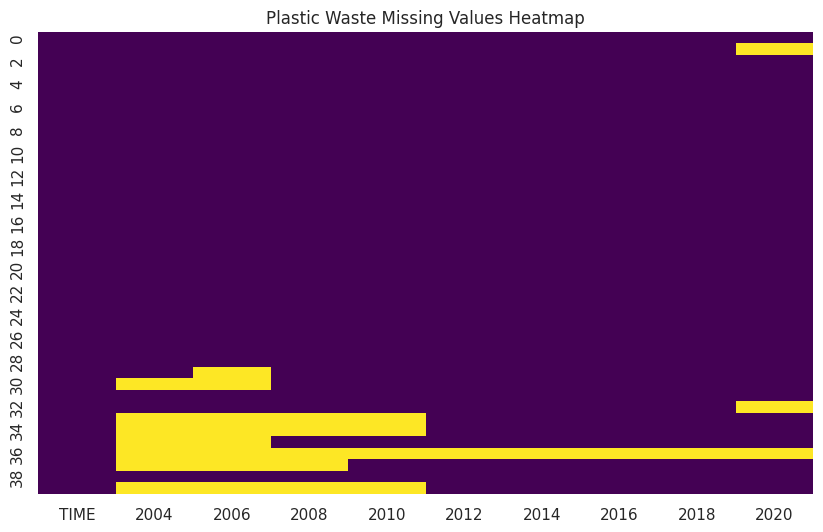

In [ ]:
# Set style
sns.set(style="whitegrid")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Plastic Waste Missing Values Heatmap')
plt.show()

### Remove Albania since no data

In [ ]:
df = df.drop(36)

### reset index

In [ ]:
df = df.reset_index(drop=True)

## put the value of 2018 for 2020 for european union since the values are massive and rise gradually

In [ ]:
df.at[1, '2020'] = 20160000.0

### Fill average for Iceland

In [ ]:
average = (df.at[29, '2004'] + df.at[29, '2008']) / 2

In [ ]:
df.at[29, '2006'] = average

### Fill average for Liechtenstein

In [ ]:
average_Liechtenstein = (df.at[30, '2008'] + df.at[30, '2010'] + df.at[30, '2012'] + df.at[30, '2014'] + df.at[30, '2016'] + df.at[30, '2018'] + df.at[30, '2020']) / 7

In [ ]:
average_Liechtenstein

272.85714285714283

In [ ]:
average_Liechtenstein = round(average_Liechtenstein)
print(average_Liechtenstein)

273


In [ ]:
df.at[30, '2004'] = average_Liechtenstein
df.at[30, '2006'] = average_Liechtenstein

### Fill average for UK

In [ ]:
average_uk = (df.at[32, '2004'] + df.at[32, '2006'] + df.at[32, '2008'] + df.at[32, '2010'] + df.at[32, '2012'] + df.at[32, '2014'] + df.at[32, '2016'] + df.at[32, '2018']) / 8

In [ ]:
average_uk

2617339.25

In [ ]:
average_uk = round(average_uk)
print(average_uk)

2617339


In [ ]:
df.at[32, '2020'] = average_uk

### Fill median for bosnia since there are outliers

In [ ]:
values = [
    df.at[33, '2012'],
    df.at[33, '2014'],
    df.at[33, '2016'],
    df.at[33, '2018'],
    df.at[33, '2020']
]
median_bosnia = statistics.median(values)

In [ ]:
df.at[33,'2004'] = median_bosnia
df.at[33,'2006'] = median_bosnia
df.at[33,'2008'] = median_bosnia
df.at[33,'2010'] = median_bosnia

### Fill average for montenegro

In [ ]:
average_mont = (df.at[34, '2012'] + df.at[34, '2014'] + df.at[34, '2016'] + df.at[34, '2018'] + df.at[34, '2020']) / 5
average_mont = round(average_mont)
df.at[34, '2004'] = average_mont
df.at[34, '2006'] = average_mont
df.at[34, '2008'] = average_mont
df.at[34, '2010'] = average_mont
average_mont = round(average_mont)
df

,TIME,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),9540000.0,11410000.0,12090000.0,12340000.0,12880000.0,14940000.0,15140000.0,17220000.0,19030000.0
1,European Union - 28 countries (2013-2020),11580000.0,14860000.0,14580000.0,14370000.0,15260000.0,17620000.0,18090000.0,20160000.0,20160000.0
2,Belgium,1332559.0,631509.0,1074910.0,716165.0,651775.0,1395458.0,715623.0,745450.0,994896.0
3,Bulgaria,44246.0,25864.0,72972.0,59950.0,99922.0,196124.0,213449.0,260939.0,367487.0
4,Czechia,169315.0,214116.0,232260.0,253923.0,325623.0,347929.0,430416.0,565453.0,556682.0
5,Denmark,53996.0,53779.0,72692.0,78548.0,104816.0,98820.0,114585.0,105457.0,139833.0
6,Germany,1138544.0,1413697.0,1936296.0,2288466.0,2530498.0,2704367.0,2734235.0,2864626.0,3097163.0
7,Estonia,74358.0,89683.0,93713.0,25390.0,22706.0,32966.0,42836.0,52389.0,43142.0
8,Ireland,309155.0,358202.0,39128.0,335134.0,121812.0,183148.0,148536.0,158578.0,197614.0
9,Greece,355234.0,755493.0,672636.0,226992.0,133232.0,192248.0,256905.0,190723.0,172216.0


### fill median for macedonia since it has outliers

In [ ]:
values2 = [
    df.at[35, '2008'],
    df.at[35, '2010'],
    df.at[35, '2012'],
    df.at[35, '2014'],
    df.at[35, '2016'],
    df.at[35, '2018'],
    df.at[35, '2020']
]
median_mac = statistics.median(values2)
median_mac

10860.0

In [ ]:
df.at[35, '2006'] = median_mac
df.at[35, '2004'] = median_mac

In [ ]:
df

,TIME,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),9540000.0,11410000.0,12090000.0,12340000.0,12880000.0,14940000.0,15140000.0,17220000.0,19030000.0
1,European Union - 28 countries (2013-2020),11580000.0,14860000.0,14580000.0,14370000.0,15260000.0,17620000.0,18090000.0,20160000.0,20160000.0
2,Belgium,1332559.0,631509.0,1074910.0,716165.0,651775.0,1395458.0,715623.0,745450.0,994896.0
3,Bulgaria,44246.0,25864.0,72972.0,59950.0,99922.0,196124.0,213449.0,260939.0,367487.0
4,Czechia,169315.0,214116.0,232260.0,253923.0,325623.0,347929.0,430416.0,565453.0,556682.0
5,Denmark,53996.0,53779.0,72692.0,78548.0,104816.0,98820.0,114585.0,105457.0,139833.0
6,Germany,1138544.0,1413697.0,1936296.0,2288466.0,2530498.0,2704367.0,2734235.0,2864626.0,3097163.0
7,Estonia,74358.0,89683.0,93713.0,25390.0,22706.0,32966.0,42836.0,52389.0,43142.0
8,Ireland,309155.0,358202.0,39128.0,335134.0,121812.0,183148.0,148536.0,158578.0,197614.0
9,Greece,355234.0,755493.0,672636.0,226992.0,133232.0,192248.0,256905.0,190723.0,172216.0


### fill 2010 value for serbia

In [ ]:
df.at[36, '2008'] = 6820.0
df.at[36, '2006'] = 6820.0
df.at[36, '2004'] = 6820.0
df

,TIME,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),9540000.0,11410000.0,12090000.0,12340000.0,12880000.0,14940000.0,15140000.0,17220000.0,19030000.0
1,European Union - 28 countries (2013-2020),11580000.0,14860000.0,14580000.0,14370000.0,15260000.0,17620000.0,18090000.0,20160000.0,20160000.0
2,Belgium,1332559.0,631509.0,1074910.0,716165.0,651775.0,1395458.0,715623.0,745450.0,994896.0
3,Bulgaria,44246.0,25864.0,72972.0,59950.0,99922.0,196124.0,213449.0,260939.0,367487.0
4,Czechia,169315.0,214116.0,232260.0,253923.0,325623.0,347929.0,430416.0,565453.0,556682.0
5,Denmark,53996.0,53779.0,72692.0,78548.0,104816.0,98820.0,114585.0,105457.0,139833.0
6,Germany,1138544.0,1413697.0,1936296.0,2288466.0,2530498.0,2704367.0,2734235.0,2864626.0,3097163.0
7,Estonia,74358.0,89683.0,93713.0,25390.0,22706.0,32966.0,42836.0,52389.0,43142.0
8,Ireland,309155.0,358202.0,39128.0,335134.0,121812.0,183148.0,148536.0,158578.0,197614.0
9,Greece,355234.0,755493.0,672636.0,226992.0,133232.0,192248.0,256905.0,190723.0,172216.0


### Fill average for Turkey

In [ ]:
average_turk = (df.at[37, '2004'] + df.at[37, '2008']) / 2
average_turk = round(average_turk)
df.at[37, '2006'] = average_turk

### fill median for kosovo

In [ ]:
values3 = [
    df.at[38, '2012'],
    df.at[38, '2014'],
    df.at[38, '2016'],
    df.at[38, '2018'],
    df.at[38, '2020']
]
median_kos = statistics.median(values3)

In [ ]:
df.at[38, '2004'] = median_kos
df.at[38, '2006'] = median_kos
df.at[38, '2008'] = median_kos
df.at[38, '2010'] = median_kos
df

,TIME,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),9540000.0,11410000.0,12090000.0,12340000.0,12880000.0,14940000.0,15140000.0,17220000.0,19030000.0
1,European Union - 28 countries (2013-2020),11580000.0,14860000.0,14580000.0,14370000.0,15260000.0,17620000.0,18090000.0,20160000.0,20160000.0
2,Belgium,1332559.0,631509.0,1074910.0,716165.0,651775.0,1395458.0,715623.0,745450.0,994896.0
3,Bulgaria,44246.0,25864.0,72972.0,59950.0,99922.0,196124.0,213449.0,260939.0,367487.0
4,Czechia,169315.0,214116.0,232260.0,253923.0,325623.0,347929.0,430416.0,565453.0,556682.0
5,Denmark,53996.0,53779.0,72692.0,78548.0,104816.0,98820.0,114585.0,105457.0,139833.0
6,Germany,1138544.0,1413697.0,1936296.0,2288466.0,2530498.0,2704367.0,2734235.0,2864626.0,3097163.0
7,Estonia,74358.0,89683.0,93713.0,25390.0,22706.0,32966.0,42836.0,52389.0,43142.0
8,Ireland,309155.0,358202.0,39128.0,335134.0,121812.0,183148.0,148536.0,158578.0,197614.0
9,Greece,355234.0,755493.0,672636.0,226992.0,133232.0,192248.0,256905.0,190723.0,172216.0


### change the time column to countries

In [ ]:
df.rename(columns={'TIME': 'COUNTRIES'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRIES  39 non-null     object 
 1   2004       39 non-null     float64
 2   2006       39 non-null     float64
 3   2008       39 non-null     float64
 4   2010       39 non-null     float64
 5   2012       39 non-null     float64
 6   2014       39 non-null     float64
 7   2016       39 non-null     float64
 8   2018       39 non-null     float64
 9   2020       39 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.2+ KB


In [ ]:
df.to_csv('plastic_waste.csv', index=False)
files.download('plastic_waste.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving medical waste.csv to medical waste.csv


# **Medical waste**

In [ ]:
df = pd.read_csv('medical waste.csv')
df

,TIME,2004,2006,2008
0,European Union - 27 countries (from 2020),25200000.0,31500000.0,26690000.0
1,European Union - 28 countries (2013-2020),29120000.0,35190000.0,29740000.0
2,Belgium,1963334.0,1337176.0,986717.0
3,Bulgaria,225717.0,558147.0,651859.0
4,Czechia,613897.0,643080.0,671885.0
5,Denmark,131036.0,141244.0,153781.0
6,Germany,6555656.0,7417257.0,7983020.0
7,Estonia,1228385.0,1201754.0,1529816.0
8,Ireland,228834.0,190682.0,176277.0
9,Greece,208460.0,144335.0,89547.0


### Drop rows with no values

In [ ]:
df = df.drop(33)
df = df.drop(34)
df = df.drop(36)
df = df.drop(37)
df = df.drop(39)

### reset index

In [ ]:
df = df.reset_index(drop=True)
df

,TIME,2004,2006,2008
0,European Union - 27 countries (from 2020),25200000.0,31500000.0,26690000.0
1,European Union - 28 countries (2013-2020),29120000.0,35190000.0,29740000.0
2,Belgium,1963334.0,1337176.0,986717.0
3,Bulgaria,225717.0,558147.0,651859.0
4,Czechia,613897.0,643080.0,671885.0
5,Denmark,131036.0,141244.0,153781.0
6,Germany,6555656.0,7417257.0,7983020.0
7,Estonia,1228385.0,1201754.0,1529816.0
8,Ireland,228834.0,190682.0,176277.0
9,Greece,208460.0,144335.0,89547.0


### fill with average Iceland

In [ ]:
average_ice = (df.at[29, '2004'] + df.at[29, '2008']) / 2
average_ice = round(average_ice)
df.at[29, '2006'] = average_ice

### Fill with the only Liechtenstein value

In [ ]:
df.at[30, '2004'] = 3060.0
df.at[30, '2006'] = 3060.0

### Fill with the only macedonia value

In [ ]:
df.at[33, '2004'] = 453.0
df.at[33, '2006'] = 453.0
df

,TIME,2004,2006,2008
0,European Union - 27 countries (from 2020),25200000.0,31500000.0,26690000.0
1,European Union - 28 countries (2013-2020),29120000.0,35190000.0,29740000.0
2,Belgium,1963334.0,1337176.0,986717.0
3,Bulgaria,225717.0,558147.0,651859.0
4,Czechia,613897.0,643080.0,671885.0
5,Denmark,131036.0,141244.0,153781.0
6,Germany,6555656.0,7417257.0,7983020.0
7,Estonia,1228385.0,1201754.0,1529816.0
8,Ireland,228834.0,190682.0,176277.0
9,Greece,208460.0,144335.0,89547.0


### change time column to country

In [ ]:
df.rename(columns={'TIME': 'COUNTRIES'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRIES  35 non-null     object 
 1   2004       35 non-null     float64
 2   2006       35 non-null     float64
 3   2008       35 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


In [ ]:
df.to_csv('medical_waste.csv', index=False)
files.download('medical_waste.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Chemical Waste**

In [ ]:
uploaded = files.upload()

Saving Chemical waste.csv to Chemical waste.csv


In [ ]:
df = pd.read_csv('Chemical waste.csv')

In [ ]:
df

,TIME,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),10010000.0,8320000.0,8570000.0,8720000.0,9130000.0,9370000.0
1,European Union - 28 countries (2013-2020),16390000.0,13890000.0,13940000.0,14710000.0,16130000.0,NaN
2,Belgium,634475.0,381905.0,459582.0,401032.0,472608.0,424518.0
3,Bulgaria,935470.0,690372.0,633668.0,109882.0,201624.0,202511.0
4,Czechia,130159.0,82098.0,81543.0,55074.0,340927.0,343168.0
5,Denmark,628500.0,478813.0,410824.0,510895.0,421108.0,408020.0
6,Germany,484483.0,543847.0,596272.0,571007.0,576630.0,533997.0
7,Estonia,30097.0,19281.0,25433.0,14485.0,25935.0,16781.0
8,Ireland,268375.0,99108.0,69173.0,127419.0,101642.0,185688.0
9,Greece,123452.0,92330.0,74144.0,132814.0,172966.0,61533.0


### Drop rows with no values

In [ ]:
df = df.drop(21)
df = df.drop(36)

### reset index

In [ ]:
df = df.reset_index(drop=True)
df

,TIME,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),10010000.0,8320000.0,8570000.0,8720000.0,9130000.0,9370000.0
1,European Union - 28 countries (2013-2020),16390000.0,13890000.0,13940000.0,14710000.0,16130000.0,NaN
2,Belgium,634475.0,381905.0,459582.0,401032.0,472608.0,424518.0
3,Bulgaria,935470.0,690372.0,633668.0,109882.0,201624.0,202511.0
4,Czechia,130159.0,82098.0,81543.0,55074.0,340927.0,343168.0
5,Denmark,628500.0,478813.0,410824.0,510895.0,421108.0,408020.0
6,Germany,484483.0,543847.0,596272.0,571007.0,576630.0,533997.0
7,Estonia,30097.0,19281.0,25433.0,14485.0,25935.0,16781.0
8,Ireland,268375.0,99108.0,69173.0,127419.0,101642.0,185688.0
9,Greece,123452.0,92330.0,74144.0,132814.0,172966.0,61533.0


### Fill with average Liechtenstein

In [ ]:
average_liech = (df.at[29, '2012'] + df.at[29, '2014'] + df.at[29, '2016'] + df.at[29, '2018'] + df.at[29, '2020']) / 5
average_liech = round(average_liech)
df.at[29, '2010'] = average_liech

### fill with average UK

In [ ]:
average_UK = (df.at[31, '2012'] + df.at[31, '2014'] + df.at[31, '2016'] + df.at[31, '2018'] + df.at[31, '2010']) / 5
average_UK = round(average_UK)
df.at[31, '2020'] = average_UK

### Fill with median bosnia

In [ ]:
values = [
    df.at[32, '2012'],
    df.at[32, '2014'],
    df.at[32, '2016'],
    df.at[32, '2018'],
    df.at[32, '2020']
]
median = statistics.median(values)
median = round(median)
df.at[32, '2010'] = median

### fill with average montenegro

In [ ]:
average_mon = (df.at[33, '2012'] + df.at[33, '2014'] + df.at[33, '2016'] + df.at[33, '2018'] + df.at[33, '2020']) / 5
average_mon = round(average_mon)
df.at[33, '2010'] = average_mon

### fill with median kosovo

In [ ]:
values = [
    df.at[37, '2012'],
    df.at[37, '2014'],
    df.at[37, '2016'],
    df.at[37, '2018'],
    df.at[37, '2020']
]
median = statistics.median(values)
median = round(median)
df.at[37, '2010'] = median

### fill with average european union

In [ ]:
average_eur = (df.at[1, '2012'] + df.at[1, '2014'] + df.at[1, '2016'] + df.at[1, '2018'] + df.at[1, '2010']) / 5
average_eur = round(average_eur)
df.at[1, '2020'] = average_eur
df

,TIME,2010,2012,2014,2016,2018,2020
0,European Union - 27 countries (from 2020),10010000.0,8320000.0,8570000.0,8720000.0,9130000.0,9370000.0
1,European Union - 28 countries (2013-2020),16390000.0,13890000.0,13940000.0,14710000.0,16130000.0,15012000.0
2,Belgium,634475.0,381905.0,459582.0,401032.0,472608.0,424518.0
3,Bulgaria,935470.0,690372.0,633668.0,109882.0,201624.0,202511.0
4,Czechia,130159.0,82098.0,81543.0,55074.0,340927.0,343168.0
5,Denmark,628500.0,478813.0,410824.0,510895.0,421108.0,408020.0
6,Germany,484483.0,543847.0,596272.0,571007.0,576630.0,533997.0
7,Estonia,30097.0,19281.0,25433.0,14485.0,25935.0,16781.0
8,Ireland,268375.0,99108.0,69173.0,127419.0,101642.0,185688.0
9,Greece,123452.0,92330.0,74144.0,132814.0,172966.0,61533.0


### change time to countries as a column name

In [ ]:
df.rename(columns={'TIME': 'COUNTRIES'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRIES  38 non-null     object 
 1   2010       38 non-null     float64
 2   2012       38 non-null     float64
 3   2014       38 non-null     float64
 4   2016       38 non-null     float64
 5   2018       38 non-null     float64
 6   2020       38 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.2+ KB


In [ ]:
df.to_csv('chemical_waste.csv', index=False)
files.download('chemical_waste.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>